## Problema del Descenso del Monte Fuji
Curso: Ingeniero de Machine Learning

By: Est. Jorge Eduardo Antelo Zampieri

El descenso de gradiente se puede comparar con el descenso de una montaña o un valle.

#### Nota sobre los datos empleados
Los datos utilizados en este ejercicio se obtuvieron mediante la función de sección transversal del mapa topográfico digital de la Autoridad de Información Geoespacial de Japón. Se trata de datos de elevación de 300 puntos en una línea que se extiende desde la bahía de Sagami, pasando por la cima del monte Fuji, hacia los Alpes del Sur.

#### 1. Visualización de los datos

In [2]:
# Importamos Numpy y Matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [24]:
data = np.genfromtxt('mtfuji_data.csv', delimiter=',', names=True)
data

array([(  0., 35.134141, 139.132082,    0.  ,     0.),
       (  1., 35.135826, 139.129202,    0.  ,   322.),
       (  2., 35.13751 , 139.126322,    0.  ,   644.),
       (  3., 35.139194, 139.123441,    0.  ,   966.),
       (  4., 35.140878, 139.12056 ,    0.  ,  1288.),
       (  5., 35.142562, 139.117679,    0.  ,  1611.),
       (  6., 35.144246, 139.114799,    6.62,  1933.),
       (  7., 35.145929, 139.111917,    7.21,  2255.),
       (  8., 35.147613, 139.109036,   12.2 ,  2577.),
       (  9., 35.149297, 139.106155,   54.41,  2899.),
       ( 10., 35.15098 , 139.103273,  171.56,  3222.),
       ( 11., 35.152664, 139.100392,  177.84,  3544.),
       ( 12., 35.154347, 139.09751 ,  228.21,  3866.),
       ( 13., 35.15603 , 139.094628,  275.38,  4188.),
       ( 14., 35.157714, 139.091747,  433.76,  4511.),
       ( 15., 35.159397, 139.088865,  371.74,  4833.),
       ( 16., 35.16108 , 139.085982,  380.06,  5155.),
       ( 17., 35.162763, 139.0831  ,  503.4 ,  5477.),
       ( 1

In [ ]:
# Extraemos las columnas de interés
posicion = data['x']
elevacion = data['elevation']

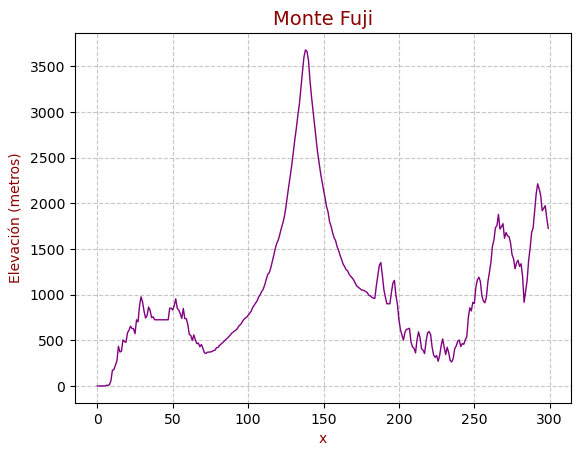

In [40]:
# Graficamos los datos usando Matplotlib
plt.plot(posicion, elevacion, color='purple', linestyle='-', linewidth=1)
plt.title('Monte Fuji', fontsize=14, color='darkred')
plt.xlabel('x', fontsize=10, color='darkred')
plt.ylabel('Elevación (metros)', fontsize=10, color='darkred')
plt.grid(True, linestyle='--', alpha=0.7)
plt.savefig('monte_fuji.png', dpi=400) 
plt.show()

#### 2. Crear una función para calcular el gradiente en un punto determinado

In [47]:
# Creamos una dunción para calcular el gradiente en un punto determinado
def compute_gradient(data, current_point):
    """
    Calcula el gradiente en un punto específico.

    Args:
        data (np.ndarray): El array de datos de elevación del Monte Fuji.
        current_point (int): El índice del punto actual para calcular la pendiente.

    Returns:
        float: El valor del gradiente en el punto actual.
    """
    # Aseguramos que el punto actual sea válido y no sea el primero (índice 0)
    if current_point <= 0 or current_point >= len(data):
        print("El punto actual debe ser mayor a 0 y menor que el número de puntos.")
        return None

    # Obtenemos la elevación del punto actual
    y_current = data[current_point]

    # Obtenemos la elevación del punto anterior
    y_previous = data[current_point - 1]

    # Calculamos el gradiente
    gradient = y_current - y_previous
    
    return gradient

# Elegimos un punto para calcular el gradiente.
punto_a_evaluar = 210

# Llamamos a la función y mostramos el resultado
pendiente = compute_gradient(elevacion, punto_a_evaluar)

if pendiente is not None:
    print(f"El gradiente en el punto {punto_a_evaluar} es: {pendiente:.2f}")

El gradiente en el punto 210 es: -13.67


#### 3. Crear una función para calcular el punto de destino

In [50]:
#Configuramos la función para calcular el próximo punto de destino
def compute_gradient(data, current_point):
    """
    Calcula el gradiente (pendiente) en un punto específico.
    """
    if current_point <= 0 or current_point >= len(data):
        return None
    
    y_current = data[current_point]
    y_previous = data[current_point - 1]
    
    gradient = y_current - y_previous
    
    return gradient

def next_destination(elevacion, current_point, alpha=0.2):
    """
    Calcula el próximo punto de destino utilizando un descenso de gradiente.

    Args:
        elevacion (np.ndarray): Los datos de elevación del Monte Fuji.
        current_point (int): El índice del punto actual.
        alpha (float): La tasa de aprendizaje.

    Returns:
        int or None: El próximo punto de destino redondeado a un entero, 
                     o None si el cálculo no es válido.
    """
    # 1. Obtener el gradiente en el punto actual
    gradient = compute_gradient(elevacion, current_point)
    
    if gradient is None:
        print("El punto actual no es válido para calcular el gradiente.")
        return None

    # 2. Aplicar la fórmula del descenso de gradiente
    next_point_float = current_point - alpha * gradient
    
    # 3. Redondear el resultado a un entero
    next_point = int(np.round(next_point_float))
    
    # 4. Validar el resultado para asegurar que el punto existe
    if next_point < 0 or next_point >= len(elevacion):
        print("El punto de destino está fuera de los límites del conjunto de datos.")
        return None
        
    return next_point

# Definir un punto de inicio y una tasa de aprendizaje
starting_point = 50
learning_rate = 0.2

# Calcular el próximo punto de destino
next_step = next_destination(elevacion, starting_point, alpha=learning_rate)

if next_step is not None:
    print(f"El próximo punto de destino desde el punto {starting_point} es: {next_step}")

El próximo punto de destino desde el punto 50 es: 54


#### 4. Crea una función para bajar una montaña

In [69]:
# Creamos una función para bajar una montaña
def compute_gradient(data, current_point):
    """
    Calcula el gradiente (pendiente) en un punto específico.
    """
    if current_point <= 0 or current_point >= len(data):
        return None
    
    y_current = data[current_point]
    y_previous = data[current_point - 1]
    
    gradient = y_current - y_previous
    
    return gradient

def next_destination(elevacion, current_point, alpha=0.2):
    """
    Calcula el próximo punto de destino utilizando un descenso de gradiente.
    """
    gradient = compute_gradient(elevacion, current_point)
    
    if gradient is None:
        return None

    next_point_float = current_point - alpha * gradient
    next_point = int(np.round(next_point_float))
    
    if next_point < 0 or next_point >= len(elevacion):
        return None
        
    return next_point

def descend_mountain(elevacion, initial_point, alpha=0.2, max_iterations=500):
    """
    Desciende la montaña utilizando el método de descenso de gradiente.

    Args:
        elevation_data (np.ndarray): Los datos de elevación del Monte Fuji.
        initial_point (int): El punto de inicio del descenso.
        alpha (float): La tasa de aprendizaje.

    Returns:
        list: Una lista con los puntos (índices) del camino recorrido.
    """
    path = [initial_point]
    current_point = initial_point
    
    # Bucle principal para el descenso
    while True:
        # Calcular el próximo punto
        next_point = next_destination(elevacion, current_point, alpha)

        # Condición de salida: si el próximo punto es el mismo que el actual, se ha "llegado al fondo"
        if next_point is None or next_point == current_point:
            break
        
        # Actualizar la ubicación y añadirla al camino
        current_point = next_point
        path.append(current_point)
    
    return path


# Definir el punto de inicio cerca de la cima
start_point = 136

# Bajar la montaña y obtener el camino recorrido
path_taken = descend_mountain(elevacion, start_point)

if path_taken:
    print("Camino recorrido (índices de puntos):", path_taken)
    print("El descenso se detuvo en el punto:", path_taken[-1])
else:
    print("No se pudo iniciar el descenso desde el punto inicial.")


Camino recorrido (índices de puntos): [136, 102, 98, 95, 93, 89, 85, 82, 79, 73, 70, 78, 77, 75]
El descenso se detuvo en el punto: 75


#### 5. Visualización del proceso de descenso

In [60]:
# obtenemos la distancia = data['distance']
distance = data['distance']

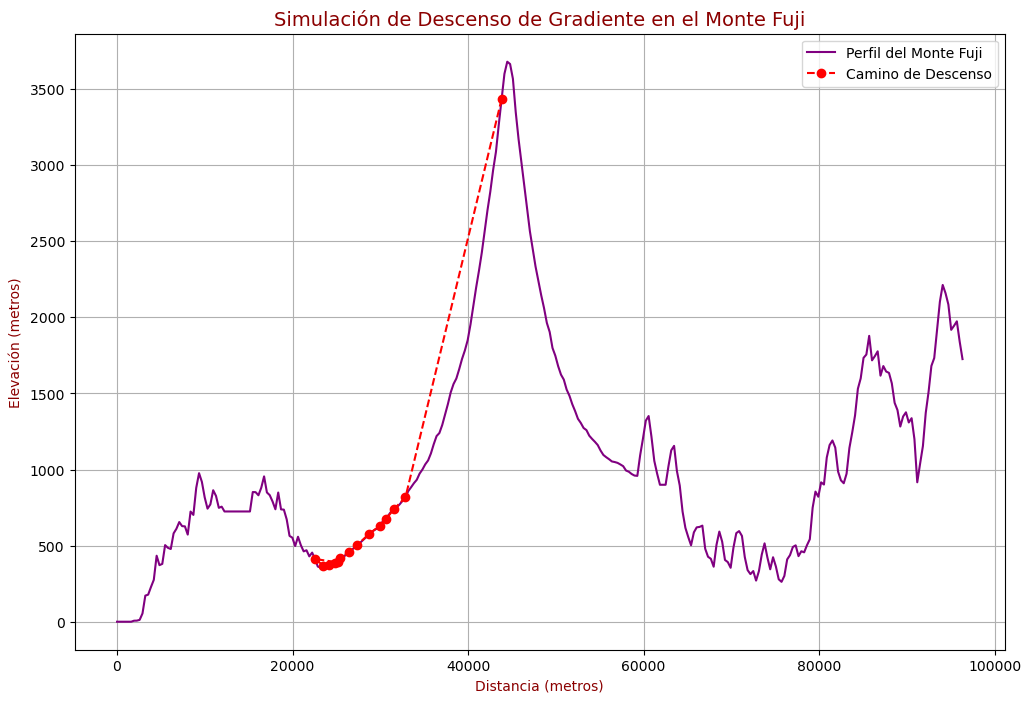

In [62]:
# Creamos la gráfica
plt.figure(figsize=(12, 8))
plt.plot(distance, elevacion, color='purple', label='Perfil del Monte Fuji')

# El camino de descenso
path_elevacion = elevacion[path_taken]
path_distance = distance[path_taken]
plt.plot(path_distance, path_elevacion, color='red', marker='o', linestyle='--', label='Camino de Descenso')

plt.title('Simulación de Descenso de Gradiente en el Monte Fuji', fontsize=14, color='darkred')
plt.xlabel('Distancia (metros)', fontsize=10, color='darkred')
plt.ylabel('Elevación (metros)', fontsize=10, color='darkred')
plt.legend()
plt.grid(True)
plt.savefig('descenso_monte_fuji.png', dpi=400)
plt.show()

#### 6. Cambiar el valor inicial

In [ ]:
# configuramos nuevamente las funicones para iterar sobre todos los puntos
def compute_gradient(data, current_point):
    """
    Calcula el gradiente (pendiente) en un punto específico.
    """
    if current_point <= 0 or current_point >= len(data):
        return None
    
    y_current = data[current_point]
    y_previous = data[current_point - 1]
    
    gradient = y_current - y_previous
    
    return gradient

def next_destination(elevation_data, current_point, alpha=0.2):
    """
    Calcula el próximo punto de destino utilizando un descenso de gradiente.
    """
    gradient = compute_gradient(elevation_data, current_point)
    
    if gradient is None:
        return None

    next_point_float = current_point - alpha * gradient
    next_point = int(np.round(next_point_float))
    
    if next_point < 0 or next_point >= len(elevation_data):
        return None
        
    return next_point

def descend_mountain(elevation_data, initial_point, alpha=0.2, max_iterations=500):
    """
    Desciende la montaña utilizando el método de descenso de gradiente.

    Args:
        elevation_data (np.ndarray): Los datos de elevación del Monte Fuji.
        initial_point (int): El punto de inicio del descenso.
        alpha (float): La tasa de aprendizaje.
        max_iterations (int): Límite de iteraciones para evitar bucles infinitos.

    Returns:
        list: Una lista con los puntos (índices) del camino recorrido.
    """
    path = [initial_point]
    current_point = initial_point
    
    # Bucle principal para el descenso con un límite de iteraciones
    for _ in range(max_iterations):
        # Calcular el próximo punto
        next_point = next_destination(elevation_data, current_point, alpha)

        # Condición de salida
        if next_point is None or next_point == current_point:
            break
        
        # Actualizar la ubicación y añadirla al camino
        current_point = next_point
        path.append(current_point)
    
    return path

# Lista para almacenar los caminos de descenso de cada punto de inicio
all_paths = []

# Iterar sobre cada posible punto de inicio (desde el índice 1)
for start_point in range(1, len(elevacion)):
    path = descend_mountain(elevacion, start_point)
    all_paths.append(path)

# Mostrar un ejemplo del resultado (el camino de un punto específico)
print("Ejemplo de camino de descenso desde el punto 136:", all_paths[136])
print("El número total de caminos calculados es:", len(all_paths))

Ejemplo de camino de descenso desde el punto 136: [137, 104, 99, 96, 90, 87, 84, 81, 77, 75]
El número total de caminos calculados es: 299


#### 7. Visualización del proceso de descenso para cada valor inicial

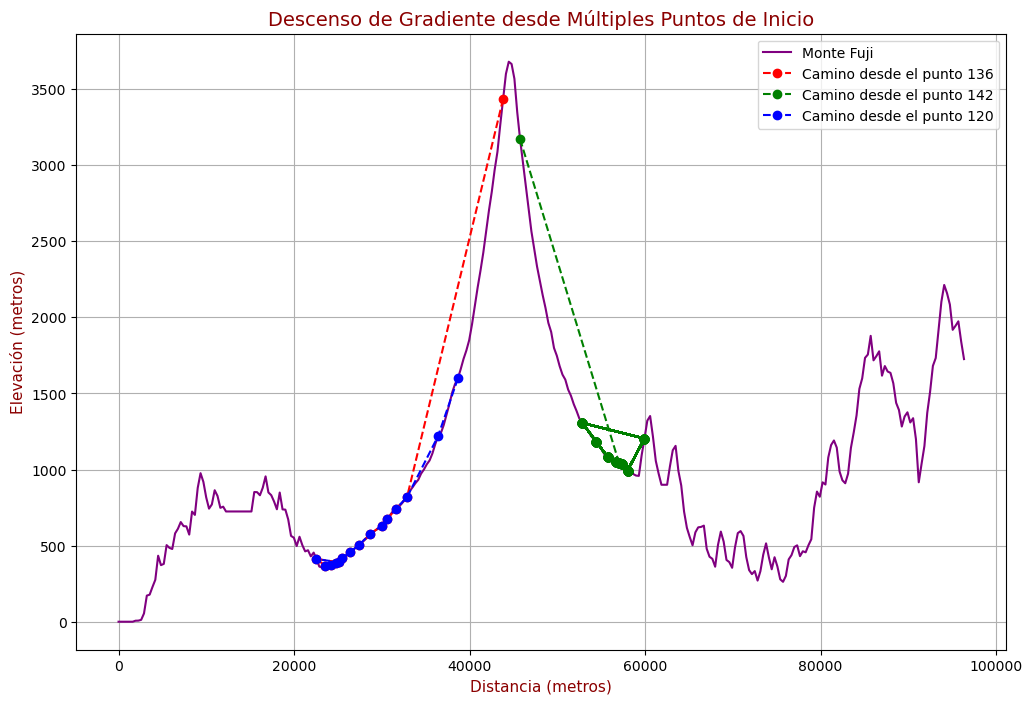

In [85]:
# visualizamos múltiples descensos desde diferentes puntos de inicio
def compute_gradient(data, current_point):
    if current_point <= 0 or current_point >= len(data):
        return None
    y_current = data[current_point]
    y_previous = data[current_point - 1]
    return y_current - y_previous

def next_destination(elevacion, current_point, alpha=0.2):
    gradient = compute_gradient(elevacion, current_point)
    if gradient is None:
        return None
    next_point_float = current_point - alpha * gradient
    next_point = int(np.round(next_point_float))
    if next_point < 0 or next_point >= len(elevacion):
        return None
    return next_point

def descend_mountain(elevacion, initial_point, alpha=0.2, max_iterations=500):
    path = [initial_point]
    current_point = initial_point
    for _ in range(max_iterations):
        next_point = next_destination(elevacion, current_point, alpha)
        if next_point is None or next_point == current_point:
            break
        current_point = next_point
        path.append(current_point)
    return path

# Estos puntos están en diferentes laderas del Monte Fuji
start_points = [136, 142, 120]
learning_rate = 0.2

# Colores para cada camino de descenso
colors = ['red', 'green', 'blue']

# Crear la figura y el eje de la gráfica
plt.figure(figsize=(12, 8))

# Graficar el perfil completo de la montaña
plt.plot(distance, elevacion, color='purple', label='Monte Fuji')

# Bucle para graficar el descenso desde cada punto de inicio
for i, start_point in enumerate(start_points):
    # Calcular el camino de descenso
    path = descend_mountain(elevacion, start_point, alpha=learning_rate)

    # Convertir los puntos del camino a sus coordenadas de elevación y distancia
    path_elevacion = elevacion[path]
    path_distance = distance[path]

    # Graficar el camino de descenso
    plt.plot(path_distance, path_elevacion, color=colors[i], marker='o', linestyle='--', 
             label=f'Camino desde el punto {start_point}')


plt.title('Descenso de Gradiente desde Múltiples Puntos de Inicio', fontsize=14, color='darkred')
plt.xlabel('Distancia (metros)', fontsize=11, color='darkred')
plt.ylabel('Elevación (metros)', fontsize=11, color='darkred')
plt.legend()
plt.grid(True)
plt.savefig('Descensos_multiples.png', dpi=400)
plt.show()